In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import seaborn as sns
import numpy as np
import glob

from sklearn.externals.joblib import Memory
memory = Memory(cachedir='/tmp', verbose=0)
#@memory.cache above any def fxn.

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 10]

from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 31.4 ms


/Users/geickelb1/anaconda/envs/rpy-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/tmp'", use "location='/tmp'" instead.
  # Remove the CWD from sys.path while we load stuff.


In [156]:
#cohort import

os.chdir('/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling') #use to change working directory
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'

final_pt_df2 = pd.read_csv(Path(wd + '/data/raw/csv/04042019_final_pt_df2_v.csv') , index_col=0) #only for patients with minimum vitals
patients= list(final_pt_df2['subject_id'].unique())
hadm_id= list(final_pt_df2['hadm_id'].unique())
icustay_id= list(final_pt_df2['icustay_id'].unique())
icustay_id= [int(x) for x in icustay_id]

time: 142 ms


In [157]:
#importing in all clinical_variable files
date= '04042019'
os.chdir(r'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/processed/merged') #folder with all prepped clinical data stored in date_file_prepped.csv format
#allFiles = glob.glob(os.getcwd() + "/{}_*.csv".format(date))

time: 2.24 ms


In [158]:
#folder to save files to:
save_date= '04042019'
save_path= wd+'/data/processed/merged'

def save_df(df, df_name='default'):
        pd.DataFrame(df).to_csv(Path(save_path+'/%s_%s.csv' %(save_date, df_name)))

time: 1.96 ms


In [159]:
save_path

'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling/data/processed/merged'

time: 2.04 ms


In [161]:
big_df= pd.read_csv(Path(save_path+'/%s_longdf_preImp.csv' %(date),  index_col=0))
big_df= big_df.reset_index(drop=True).iloc[:,1:]
#converting delta to timedelta format
big_df['delta']= pd.to_timedelta(big_df['delta'])

time: 35.8 s


In [162]:
big_df[big_df['label']=="o2_flow"]['value'].describe()

count     14734
unique        2
top         0.0
freq      13734
Name: value, dtype: object

time: 512 ms


In [178]:
# pd.DataFrame(big_df).to_csv(Path(
#     wd+'/data/processed/%s_longdf_preImp.csv' %(date)))

time: 1.22 ms


# 04-08-19: need to visualize current data. need to see matrix of patient by time. 

In [8]:
big_df.head()

,icustay_id,value,uom,label,delta,t_0,source,subject_id,first_pos_else_neg_ssc
0,200012.0,1,daily_sofa_score,daily_sofa,0 days,2153-12-23,longdf_preImp.csv,28448.0,NaN
1,200012.0,1,daily_sofa_score,daily_sofa,0 days,2153-12-23,sofa,28448.0,NaN
2,200012.0,0.0,y/n,dobutamine,0 days,2153-12-23,dobutamine,28448.0,NaN
3,200012.0,0.0,y/n,dobutamine,0 days,2153-12-23,longdf_preImp.csv,28448.0,NaN
4,200012.0,0.0,y/n,dopamine,0 days,2153-12-23,dopamine,28448.0,NaN


time: 67.4 ms


In [43]:
#making a test df of one patient so i can mess around with it
test_df=big_df[big_df['icustay_id']==200095.0].copy() #299995 
#275841- a clear positive /prolonged
#200059.0- had a ptp of diasbp of 124, need to investigate

time: 15.7 ms


In [54]:
final_pt_df2.head()

,subject_id,hadm_id,t_0_sc,icustay_id,ab_course,t_0,t_end_consec,ICU_admit,dod_hosp,dod_ssn,dod_delta,org_list,spec_type_list,first_pos_else_neg_ssc,sc_result,final_bin
0,3301,194119,2116-06-27 00:00:00,222957.0,full,2116-06-28,2116-06-28,2116-06-26 20:05:51,NaN,NaN,NaN,NaN,NaN,2116-06-27 00:00:00,negative,C_neg/A_full
1,3281,113868,2115-09-14 19:25:00,240363.0,partial,2115-09-14,2115-09-16,2115-09-13 23:16:50,2116-03-06 00:00:00,2116-03-06 00:00:00,0 days 00:00:00.000000000,NaN,NaN,2115-09-14 19:25:00,negative,C_neg/A_partial
2,3277,163302,2123-07-24 09:30:00,220265.0,full,2123-07-24,2123-08-06,2123-07-21 13:04:46,NaN,NaN,NaN,NaN,NaN,2123-07-24 09:30:00,negative,C_neg/A_full
3,3276,111860,2168-08-31 00:00:00,224362.0,partial,2168-08-30,2168-08-30,2168-08-26 21:21:59,NaN,NaN,NaN,NaN,NaN,2168-08-31 00:00:00,negative,C_neg/A_partial
6,3272,105931,2114-11-20 15:50:00,296728.0,partial,2114-11-21,2114-11-23,2114-11-20 19:51:15,NaN,NaN,NaN,NaN,NaN,2114-11-20 15:50:00,negative,C_neg/A_partial


time: 16.4 ms


In [45]:
test_df['delta'].describe()

count                      1294
mean     1 days 12:08:29.860896
std      0 days 21:58:35.807311
min             0 days 00:00:00
25%             0 days 16:57:00
50%             1 days 11:58:00
75%             2 days 06:52:00
max             3 days 00:00:00
Name: delta, dtype: object

time: 6.19 ms


In [46]:
#which measures have the most values?
test_df['label'].value_counts().head(5)

resprate        178
meanartpress    177
sysbp           169
diasbp          169
heartrate       151
Name: label, dtype: int64

time: 3.44 ms


In [47]:
test_df2=test_df.loc[test_df.loc[:,'label']=='heartrate',['delta','value']].copy()
test_df2.head()

,delta,value
14058,00:00:00,98.0
14076,00:24:00,99.0
14084,00:56:00,91.0
14102,01:00:00,99.0
14115,01:56:00,93.0


time: 8.18 ms


### trying to get complete patient/time matrix for a single patient

### step1: limit analysis to numerical variables and ensure in correct format.
* may need to remove factor variables later

In [48]:
#taking out all categorical variables
label_list=['daily_sofa',
 'dobutamine',
 'dopamine',
 'epinephrine',
 'first_admit_age',
 'norepinephrine',
 'o2_flow',
 'phenylephrine',
 'rrt',
 'vasopressin',
 'weight',
 'diasbp',
 'heartrate',
 'meanartpress',
 'resprate',
 'spo2',
 'sysbp',
 'temperature',
 'glucose',
 'pco2',
 'ph',
 'potassium',
 'bicarbonate',
 'bun',
 'chloride',
 'creatinine',
 'hemoglobin',
 'platelet',
 'sodium',
 'wbc',
 'pao2/fio2',
 'leukocyte',
 'nitrite',
 'mingcs']


#convert to numbers: 'vent_recieved',

time: 9.77 ms


In [77]:
#formatting dataframe
test_df=test_df[test_df['label'].isin(label_list)] #limiting to numerical variables
test_df.loc[test_df['value']=="Neg/Not_tested", "value"]=0
test_df['value']= pd.to_numeric(test_df['value']) #converting to numeric 


time: 9.02 ms


In [50]:
#df2 is for a specific label= heartrate
test_df2=test_df.loc[test_df.loc[:,'label']=='diasbp',['delta','value']].copy()

time: 3.71 ms


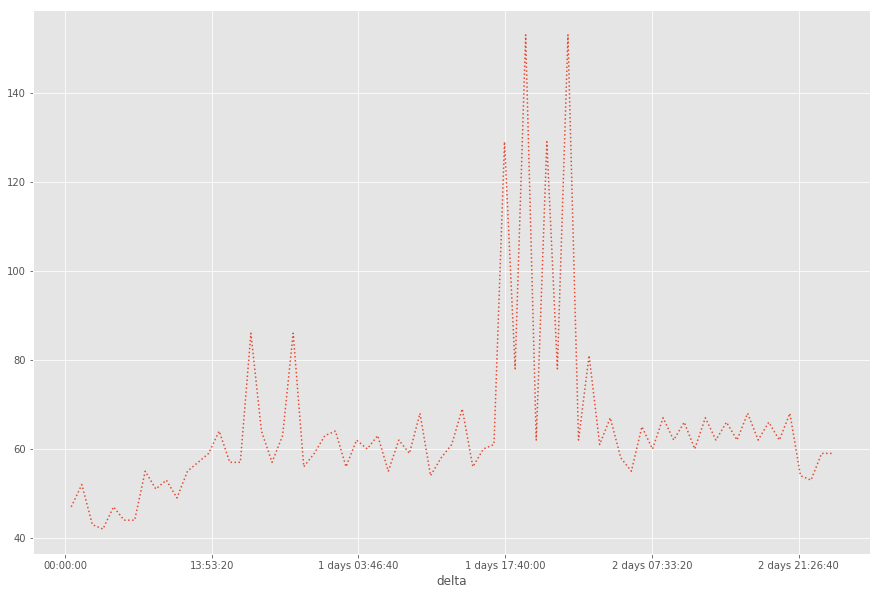

time: 219 ms


In [51]:
##testing: resampling for 1 patient and 1 lab value. 
hourly=test_df2.set_index('delta').resample("H").max().fillna(method="ffill") #max and 
#hourly=test_df2.resample("H",on='delta').count() #same as above but don't need to set delta to index.
hourly['value'].plot(style=[':','--','-']) #works

In [42]:
test_df2['value'].max()#['label']=='diasbp'

100.0

time: 2.16 ms


### step2: write fxn to standardize timeframe to 0:00:00 to 2days 23:00:00 for hourly after resampling. (this code isn't used in final).

In [18]:
def timeframe_fix_fxn(df):
    """
    this fxn appends a starting and ending time onto dataframe.
    df is a dataframe with delta and value for a specific label.
    """
    #adding in start time of 0:00:00
    if (df.sort_values("delta")['delta'].iloc[0] != pd.Timedelta("00:00:00")):
        ##alternative way of doing it:
#         df.loc[-1] = [pd.Timedelta("00:00:00"), None]  # adding a row
#         df.index = df.index + 1  # shifting index
#         df = df.sort_index()  # sorting by index
        df2=pd.DataFrame([[pd.Timedelta('00:00:00'),None]], columns=['delta','value'])
        df=df.append(df2)
    else:
        pass
    
    #adding in end time of '2 days 23:00:00'
    if (df.sort_values("delta")['delta'].iloc[-1] != pd.Timedelta('2 days 23:00:00')):
        df3=pd.DataFrame([[pd.Timedelta('2 days 23:00:00'),None]], columns=['delta','value'])
        df=df.append(df3)
    else:
        pass
    
    df= df.sort_values('delta')
    return(df)


time: 26.3 ms


In [19]:
#adding start and endtime if not already there. works for single variable and single patient.
test_df3=timeframe_fix_fxn(test_df2) #adding on 0:00:00 start and 2day 23:00:00 end. 

time: 11.2 ms


In [20]:
test_df3.head()

,delta,value
0,00:00:00,NaN
5578,04:00:00,80.0
5591,04:44:00,91.0
5623,05:16:00,92.0
5645,06:16:00,91.0


time: 11.5 ms


In [21]:
# test_resampled=test_df3.set_index('delta').resample("H").fillna(method='ffill') #resampling at hour interval using first value carry forward. 
# test_resampled.head(7)

time: 952 µs


In [22]:
# test_resampled.plot() 

time: 1.03 ms


### problem: only works for single variable, doesn't work with many variables.
### solution: i'll just add a delta value to the initial dataset. (currently only works for this single patient, need to expand if i go to all patients)
note, by adding a Null bicarbonate value at t_0+72 it records a value there and is thus is used as the endpoint to the resampling fxn. if there is infact a value there, then it will be taken instead of the null (due to the max fxn). 

In [23]:
#adding a row with null values and final timepoint
df= pd.DataFrame(test_df.iloc[-1].T)
df.iloc[:,0]=None
df=pd.DataFrame(df).T
df['delta']=pd.Timedelta("2 days 23:00:00")
df['label']="bicarbonate"

test_df=test_df.append(df)

time: 23 ms


### step3: visualize the resampled variables for a single patient

In [24]:
#works! groups timeseries object by label and filters delta by 1H freq. 
grouper = test_df[['delta','value','label']].groupby([pd.Grouper(key="delta",freq='1H'), 'label'])

grouper['value'].max().unstack("label").head(5) #visualizing first 5 rows

label,bicarbonate,bun,chloride,creatinine,daily_sofa,diasbp,dobutamine,dopamine,epinephrine,first_admit_age,...,potassium,resprate,rrt,sodium,spo2,sysbp,temperature,vasopressin,wbc,weight
delta,,,,,,,,,,,,,,,,,,,,,
00:00:00,NaN,NaN,NaN,NaN,6.0,NaN,0.0,0.0,0.0,78.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,54.0
01:00:00,30.0,50.0,101.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,NaN,NaN,135.0,NaN,NaN,NaN,NaN,10.2,NaN
02:00:00,NaN,NaN,106.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,135.0,NaN,NaN,NaN,NaN,NaN,NaN
03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04:00:00,22.0,35.0,107.0,1.0,NaN,66.0,NaN,NaN,NaN,NaN,...,3.5,18.0,NaN,139.0,100.0,117.0,33.6,NaN,8.5,NaN


time: 108 ms


In [25]:
#works! takes one patient and converts from long to wide format all values 
test_unstacked=grouper['value'].max().unstack("label") 

#works! resamples by specified timeinterval, takes max if multiple are present, and carries last value forward if none are present. 
###when should i carry last value forward? before or after max is taken?
test_unstacked_resampled=test_unstacked.resample("H").max().fillna(method='ffill')
test_unstacked_resampled.head(24)
#do i want to carry forward only certain # of times?  maybe try 4. 

label,bicarbonate,bun,chloride,creatinine,daily_sofa,diasbp,dobutamine,dopamine,epinephrine,first_admit_age,...,potassium,resprate,rrt,sodium,spo2,sysbp,temperature,vasopressin,wbc,weight
delta,,,,,,,,,,,,,,,,,,,,,
00:00:00,NaN,NaN,NaN,NaN,6.0,NaN,0.0,0.0,0.0,78.9,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,54.0
01:00:00,30.0,50.0,101.0,1.5,6.0,NaN,0.0,0.0,0.0,78.9,...,4.6,NaN,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
02:00:00,30.0,50.0,106.0,1.5,6.0,NaN,0.0,0.0,0.0,78.9,...,3.5,NaN,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
03:00:00,30.0,50.0,106.0,1.5,6.0,NaN,0.0,0.0,0.0,78.9,...,3.5,14.0,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
04:00:00,22.0,35.0,107.0,1.0,6.0,66.0,0.0,0.0,0.0,78.9,...,3.5,18.0,0.0,139.0,100.0,117.0,33.600000,0.0,8.5,54.0
05:00:00,22.0,35.0,106.0,1.0,6.0,93.0,0.0,0.0,0.0,78.9,...,3.5,21.0,0.0,135.0,100.0,135.0,33.833334,0.0,8.5,54.0
06:00:00,22.0,35.0,106.0,1.0,6.0,78.0,0.0,0.0,0.0,78.9,...,3.5,14.0,0.0,135.0,100.0,138.0,34.944445,0.0,8.5,54.0
07:00:00,22.0,35.0,107.0,1.0,6.0,78.0,0.0,0.0,0.0,78.9,...,3.5,18.0,0.0,139.0,100.0,147.0,33.600000,0.0,8.5,54.0
08:00:00,22.0,35.0,107.0,1.0,6.0,93.0,0.0,0.0,0.0,78.9,...,3.5,21.0,0.0,139.0,100.0,150.0,35.888888,0.0,8.5,54.0


time: 121 ms


In [26]:
list(test_unstacked)

['bicarbonate',
 'bun',
 'chloride',
 'creatinine',
 'daily_sofa',
 'diasbp',
 'dobutamine',
 'dopamine',
 'epinephrine',
 'first_admit_age',
 'glucose',
 'heartrate',
 'hemoglobin',
 'leukocyte',
 'meanartpress',
 'nitrite',
 'norepinephrine',
 'o2_flow',
 'pao2/fio2',
 'pco2',
 'ph',
 'phenylephrine',
 'platelet',
 'potassium',
 'resprate',
 'rrt',
 'sodium',
 'spo2',
 'sysbp',
 'temperature',
 'vasopressin',
 'wbc',
 'weight']

time: 2.62 ms


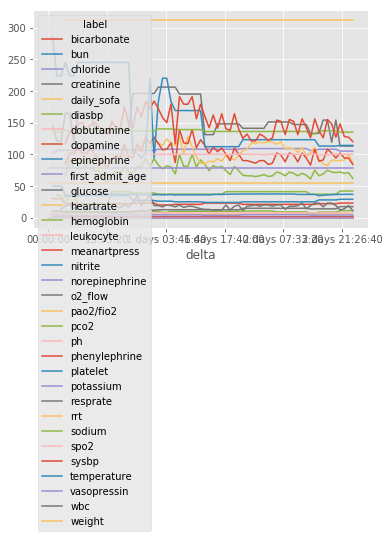

time: 416 ms


In [27]:
test_unstacked_resampled.plot()

#### step taking above plot and making it more readable

facetgrid isn't a great option because the variable scales aren't the same. I could standardize but then it begs the question, what do i want to use as the average (ie all of a patients values? the whole population for that variable?). 

would be nice to be able to stack graphs head to tail for each variable.

In [28]:
import seaborn as sns

time: 676 µs


In [29]:
test_unstacked_resampled.reset_index().head()

label,delta,bicarbonate,bun,chloride,creatinine,daily_sofa,diasbp,dobutamine,dopamine,epinephrine,...,potassium,resprate,rrt,sodium,spo2,sysbp,temperature,vasopressin,wbc,weight
0,00:00:00,NaN,NaN,NaN,NaN,6.0,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,54.0
1,01:00:00,30.0,50.0,101.0,1.5,6.0,NaN,0.0,0.0,0.0,...,4.6,NaN,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
2,02:00:00,30.0,50.0,106.0,1.5,6.0,NaN,0.0,0.0,0.0,...,3.5,NaN,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
3,03:00:00,30.0,50.0,106.0,1.5,6.0,NaN,0.0,0.0,0.0,...,3.5,14.0,0.0,135.0,NaN,NaN,NaN,0.0,10.2,54.0
4,04:00:00,22.0,35.0,107.0,1.0,6.0,66.0,0.0,0.0,0.0,...,3.5,18.0,0.0,139.0,100.0,117.0,33.6,0.0,8.5,54.0


time: 21.8 ms


In [30]:
test_restacked=pd.DataFrame(test_unstacked_resampled.stack(dropna=False))#.reset_index()
test_restacked=test_restacked.rename(columns={0:"value"})
test_restacked=test_restacked.reset_index()
ten_min=test_restacked['delta'].apply(lambda x:x.seconds/600 + (x.days*144))

test_restacked['m10']= ten_min
test_restacked.head()


,delta,label,value,m10
0,0 days,bicarbonate,NaN,0.0
1,0 days,bun,NaN,0.0
2,0 days,chloride,NaN,0.0
3,0 days,creatinine,NaN,0.0
4,0 days,daily_sofa,6.0,0.0


time: 47.6 ms


In [31]:
test_restacked['delta'].max()
ten_min.max()

432.0

time: 4.12 ms


In [32]:
#restricting the label list for testing
#test_restacked.reset_index()
restricted_list=[
 'diasbp',
 'heartrate',
 'meanartpress',
 'resprate',
 'spo2',
 'sysbp',
 'temperature',
 'glucose',
 'pco2',
 'ph',
 'potassium',
 'bicarbonate']

test_restacked2= test_restacked[test_restacked['label'].isin(restricted_list)]

time: 14 ms


In [33]:
138/6
1440

1440

time: 4.66 ms


In [34]:
# #seaborn example
# # Create the data
# rs = np.random.RandomState(1979)
# x = rs.randn(500)
# g = np.tile(list("ABCDEFGHIJ"), 50)
# df = pd.DataFrame(dict(x=x, g=g))
# m = df.g.map(ord)
# df["x"] += m

# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)
# # Draw the densities in a few steps
# g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)


# g.map(label, "x")

# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

time: 10.3 ms


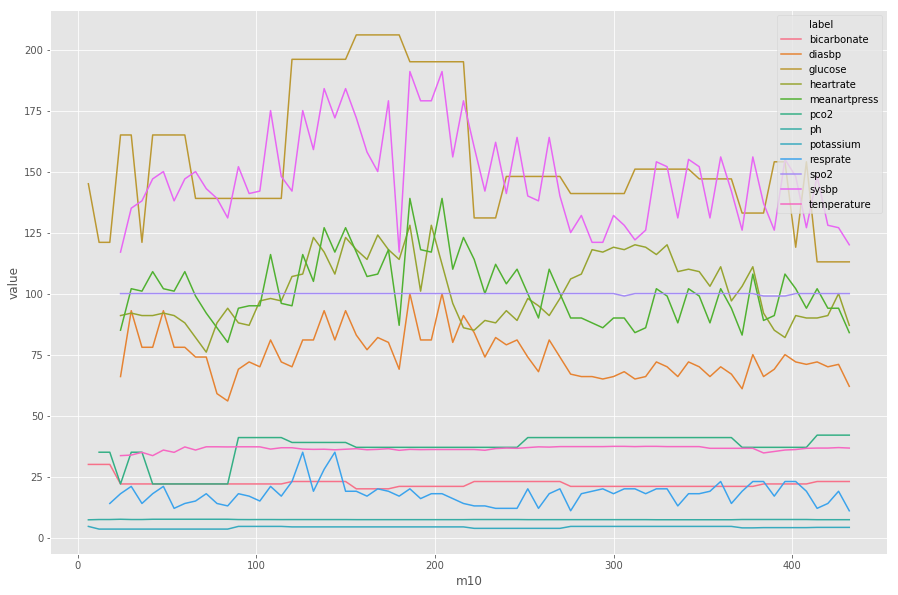

time: 531 ms


In [35]:
#test_restacked.head()
plt.rcParams['figure.figsize'] = [15, 10]
ax = sns.lineplot(x="m10", y="value",
                   hue="label", data=test_restacked2)

## notes:
* can try to standardize using median of existing population. 


* good first step:

sensitivity analysis using only blood cultures
could try different types of aggregation (using medians, stdev's, max/min delta, etc).

* good second step:
subgrouping approach: expert driven vs data driven. perhapse the patient heterogenity is masking the signal. start with clustering (kmeans). use variables that were on top of baseline model. 

check pca plot, why was it streaky? maybe some locality patterns?  TRY local machine learning methods (ie using only patients that are similar to those patients to train model). idea of local methods: use patients that are similar to each other to predict like patients. similar to clustering first. 

in semisupervised: don't use all labels in training data. local methods are different in that you still use all labels. similar to nearest neighbor approach. can think of it as more granular stratifid model building. 

* couple papers that use rnn with missing data in timeseries (ie can impute and predict within the network).



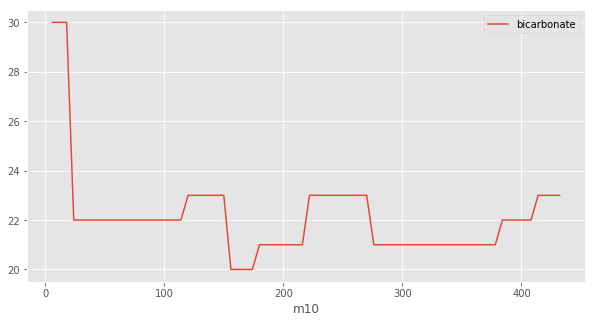

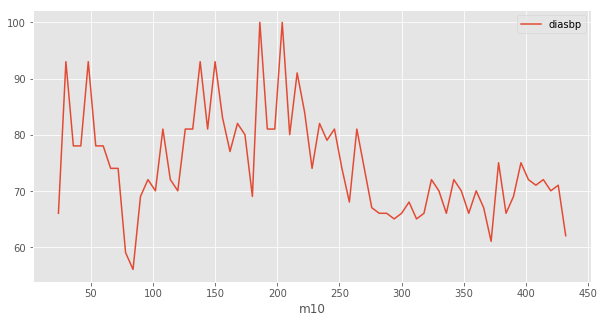

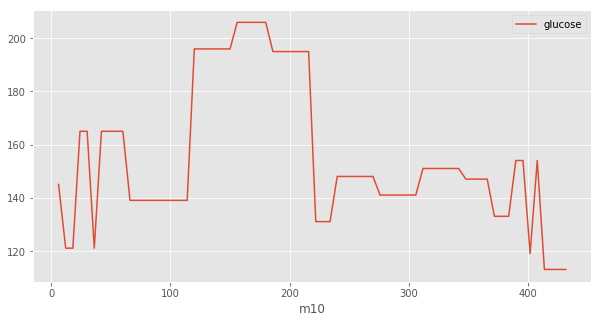

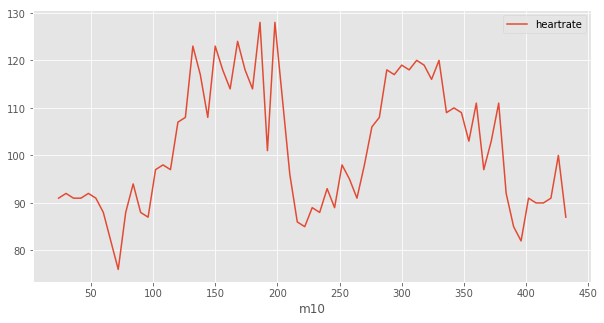

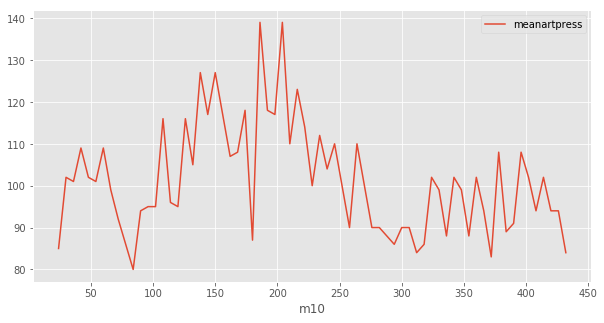

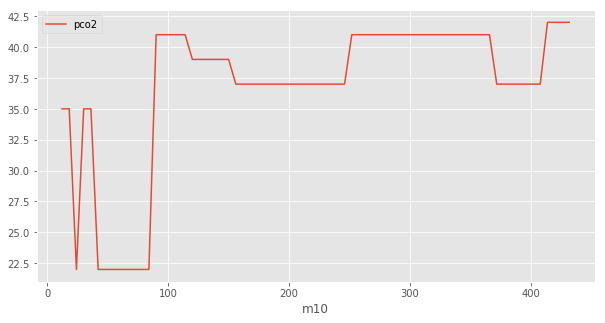

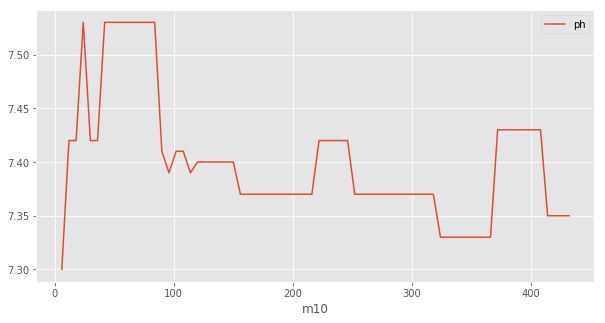

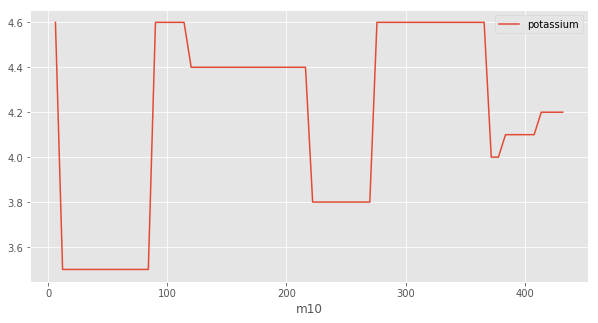

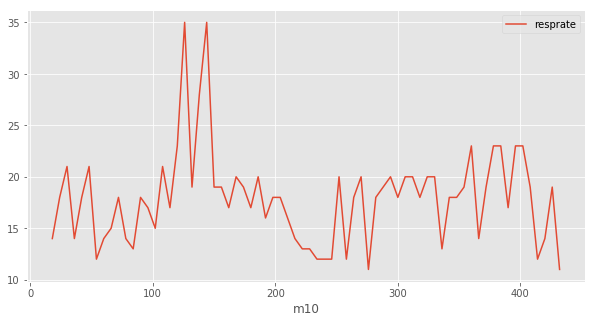

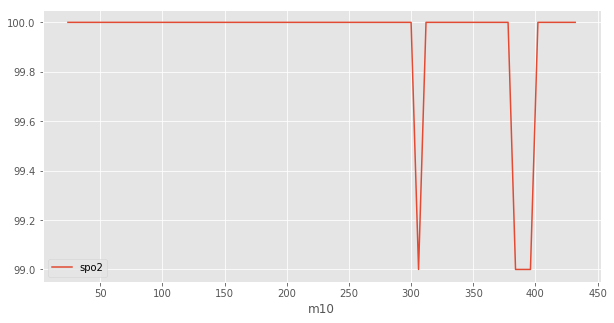

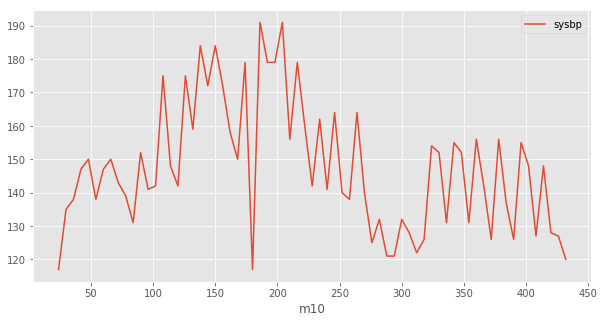

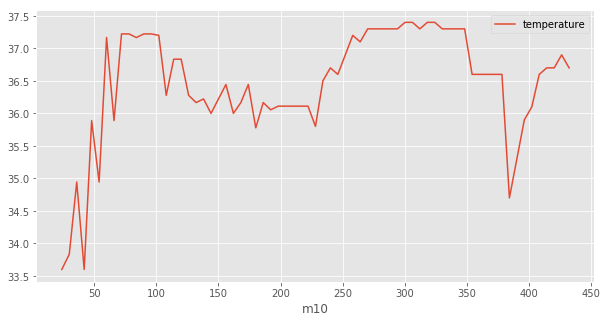

time: 2.29 s


In [53]:
# ax = sns.lineplot(x="m10", y="value",
#                    hue="label", data=test_restacked2)
#?test_restacked2.plot()
#test_restacked2.groupby('label').plot(x="m10",y="value",label=label)

#test_grouped=test_restacked2.groupby('label')#.plot(x="m10",y="value",label=label)

for index, group in test_restacked2.groupby('label'):
    plt.rcParams['figure.figsize'] = [10, 5]
    group.plot(x="m10",y='value', label=index)

# repeating the visualization but standardizing the values:
So for standardizing to median you should use median of all values (or alternatively all the values for the last 24h of ICU for survivors only - as a proxy of “better” health state, that’s what we use in our pediatric ICU research) and then you standardize by: (x - median)/(3rd quartile - 1st quartile), so like the zscore but instead of SD you use the IQR. 

#### finding just the "healthy" culture neg ab partial patients

In [198]:
final_bin=final_pt_df2[['icustay_id',"final_bin"]].copy()
#list of healthy pt
healthy_pt=list(final_bin[final_bin['final_bin']=="C_neg/A_partial"]['icustay_id'])
del(final_bin)

time: 6.26 ms


In [199]:
#formatting big_df to be limited to only numeric columns
norm_df=big_df[big_df['label'].isin(label_list)].copy() #limiting to numerical variables
norm_df.loc[norm_df['value']=="Neg/Not_tested", "value"]=0
norm_df.loc[norm_df['value']=="pos", "value"]=1
norm_df['value']= pd.to_numeric(norm_df['value']) #converting to numeric 

#healthy patients filter
healthy_df=norm_df[norm_df['icustay_id'].isin(healthy_pt)].copy() #only numerical values for cneg/ab partial pt

time: 6.7 s


In [201]:
#finding the last 24 hours of each healthy patient.
healthy_pt_end=pd.DataFrame(healthy_df.groupby("icustay_id")['delta'].max())

healthy_pt_end["start"]=healthy_pt_end['delta']- pd.to_timedelta("1 day 00:00:00")
healthy_pt_end=healthy_pt_end.rename(columns={"delta":"end"}).reset_index()

healthy_df= pd.merge(healthy_df,healthy_pt_end, left_on="icustay_id", right_on="icustay_id", how="left" ) #now have the last 24 hours annotated for each patient as start and end.
healthy_df.head()

time: 60.3 ms


In [192]:
#calculating medians and iqr for each label based on healthy patient's last 24 hours in icu
median_label=pd.DataFrame(healthy_df.groupby("label")['value'].median()).reset_index()
median_label=median_label.rename(columns={'value':"median"})
iqr_label=pd.DataFrame(healthy_df.groupby("label")['value'].quantile(0.75)-healthy_df.groupby("label")['value'].quantile(0.25)).reset_index()
iqr_label=iqr_label.rename(columns={'value':"iqr"})
median_label=pd.merge(median_label,iqr_label)  #final median df
del(iqr_label)
        
save_df(median_label, df_name="healthy_medians")

time: 754 ms


### restarting with single patient test_df using standardized values
So for standardizing to median you should use median of all values (or alternatively all the values for the last 24h of ICU for survivors only - as a proxy of “better” health state, that’s what we use in our pediatric ICU research) and then you standardize by: (x - median)/(3rd quartile - 1st quartile), so like the zscore but instead of SD you use the IQR.

In [216]:
#making a test df of one patient so i can mess around with it
test_df=norm_df[norm_df['icustay_id']==200095.0].copy() #299995 

#merging in medians/iqr
test_df=pd.merge(test_df, median_label)
test_df.head()
test_df['standardize']=((test_df['value']-test_df['median'])/test_df['iqr']).fillna(0)
#normalizing


time: 15 ms


### adding a row with null values and final timepoint

In [217]:
#adding a row with null values and final timepoint
df= pd.DataFrame(test_df.iloc[-1].T)
df.iloc[:,0]=None
df=pd.DataFrame(df).T
df['delta']=pd.Timedelta("2 days 23:00:00")
df['label']="bicarbonate"
test_df=test_df.append(df)


time: 13.4 ms


In [218]:
test_df

,icustay_id,value,uom,label,delta,t_0,source,subject_id,median,iqr,standardize
0,200095,6,daily_sofa_score,daily_sofa,0 days 00:00:00,2113-10-28,sofa,30284,3,3,1
1,200095,4,daily_sofa_score,daily_sofa,1 days 00:00:00,2113-10-28,sofa,30284,3,3,0.333333
2,200095,11,daily_sofa_score,daily_sofa,2 days 00:00:00,2113-10-28,sofa,30284,3,3,2.66667
3,200095,0,y/n,dopamine,0 days 00:00:00,2113-10-28,dopamine,30284,0,0,0
4,200095,0,y/n,epinephrine,0 days 00:00:00,2113-10-28,epinephrine,30284,0,0,0
5,200095,300,years,first_admit_age,0 days 00:00:00,2113-10-28,pt_info,30284,65.2,26.065,9.00825
6,200095,123,NaN,glucose,0 days 00:00:00,2113-10-28,vitals,30284,127,56,-0.0714286
7,200095,93,mg/dL,glucose,0 days 01:00:00,2113-10-28,labs,30284,127,56,-0.607143
8,200095,93,mg/dL,glucose,0 days 02:00:00,2113-10-28,vitals,30284,127,56,-0.607143
9,200095,102,NaN,glucose,0 days 06:00:00,2113-10-28,vitals,30284,127,56,-0.446429


time: 40.3 ms


In [220]:
#visualizing for single patient:
#works! groups timeseries object by label and filters delta by 1H freq. 
grouper = test_df[['delta','standardize','label']].groupby([pd.Grouper(key="delta",freq='1H'), 'label'])

grouper['standardize'].max().unstack("label").head(5) #visualizing first 5 rows

#works! takes one patient and converts from long to wide format all values 
test_unstacked=grouper['standardize'].max().unstack("label") 

#works! resamples by specified timeinterval, takes max if multiple are present, and carries last value forward if none are present. 
###when should i carry last value forward? before or after max is taken?
test_unstacked_resampled=test_unstacked.resample("H").max().fillna(method='ffill')
test_unstacked_resampled.head(24)
#do i want to carry forward only certain # of times?  maybe try 4. 


label,bicarbonate,bun,chloride,creatinine,daily_sofa,diasbp,dobutamine,dopamine,epinephrine,first_admit_age,...,platelet,potassium,resprate,rrt,sodium,spo2,sysbp,temperature,vasopressin,wbc
delta,,,,,,,,,,,,,,,,,,,,,
00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,9.008249,...,NaN,NaN,1.714286,0.0,NaN,0.75,NaN,0.308511,0.0,NaN
01:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.666667,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,1.571429,0.0,0.6,0.75,-1.366667,0.308511,0.0,0.548387
02:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.888889,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,1.428571,0.0,0.6,0.75,-0.100000,0.308511,0.0,0.548387
03:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.888889,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,1.428571,0.0,0.6,0.75,-0.066667,0.308511,0.0,0.548387
04:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.944444,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,1.142857,0.0,0.6,0.75,-0.233333,0.840426,0.0,0.548387
05:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.777778,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,0.571429,0.0,0.6,0.75,-1.133333,0.840426,0.0,0.548387
06:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.833333,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,0.571429,0.0,0.6,0.75,-0.266667,0.840426,0.0,0.548387
07:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.833333,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,0.857143,0.0,0.6,0.75,-0.233333,0.000000,0.0,0.548387
08:00:00,-0.4,2.190476,0.375,0.333333,1.0,-0.222222,NaN,0.0,0.0,9.008249,...,-0.099237,-0.285714,0.857143,0.0,0.6,0.75,-0.066667,0.042553,0.0,0.548387


time: 159 ms


In [221]:
###using seaborn to make more readable

test_restacked=pd.DataFrame(test_unstacked_resampled.stack(dropna=False))#.reset_index()
test_restacked=test_restacked.rename(columns={0:"standardize"})
test_restacked=test_restacked.reset_index()
ten_min=test_restacked['delta'].apply(lambda x:x.seconds/600 + (x.days*144))

test_restacked['m10']= ten_min

restricted_list=[
 'diasbp',
 'heartrate',
 'meanartpress',
 'resprate',
 'spo2',
 'sysbp',
 'temperature',
 'glucose',
 'pco2',
 'ph',
 'potassium',
 'bicarbonate']

test_restacked2= test_restacked[test_restacked['label'].isin(restricted_list)]


time: 96.4 ms


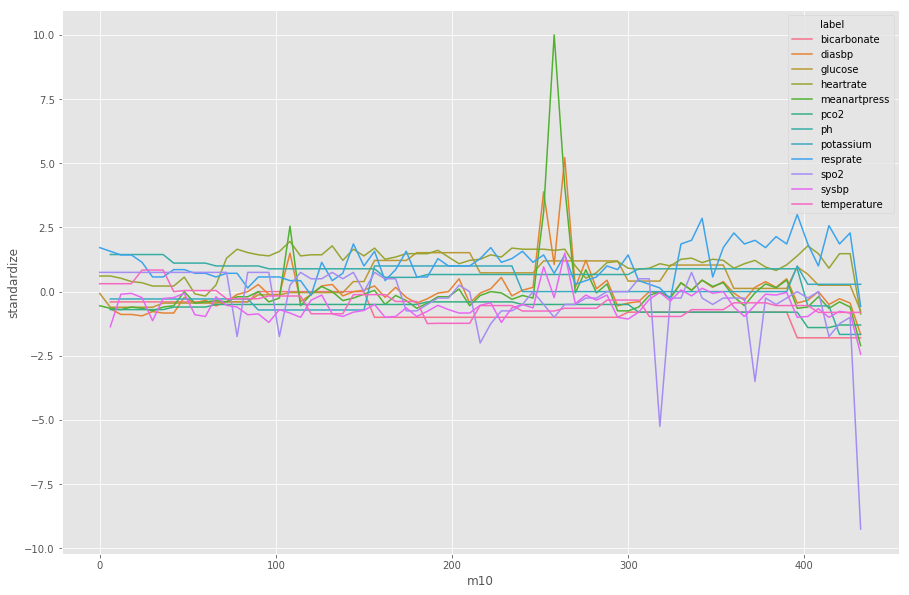

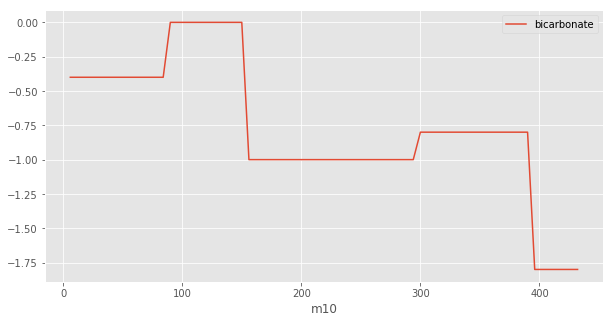

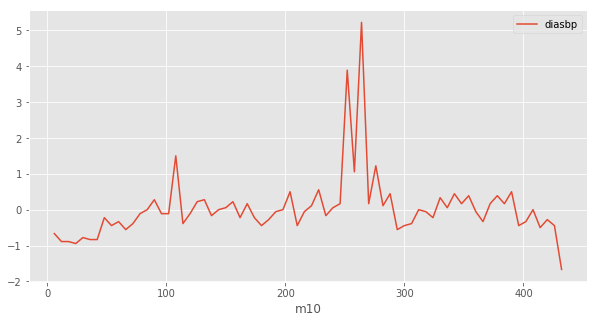

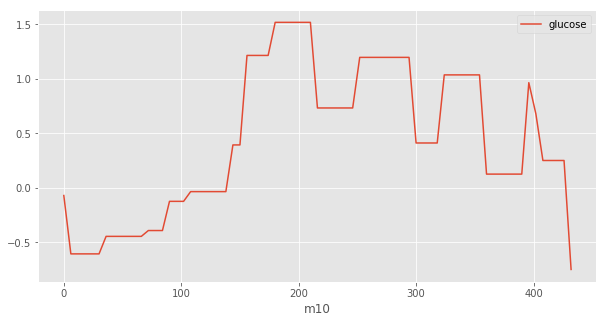

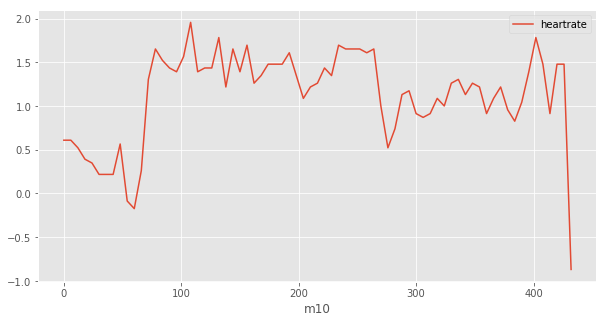

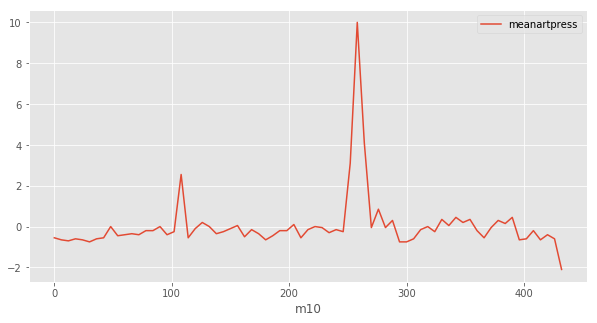

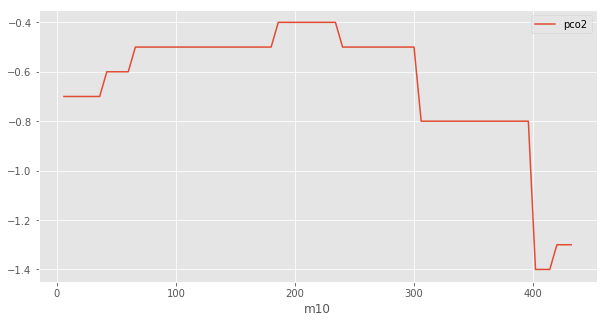

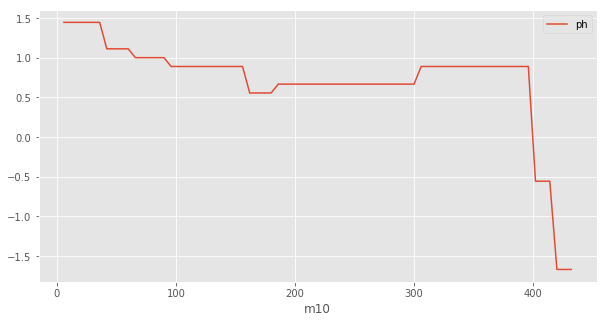

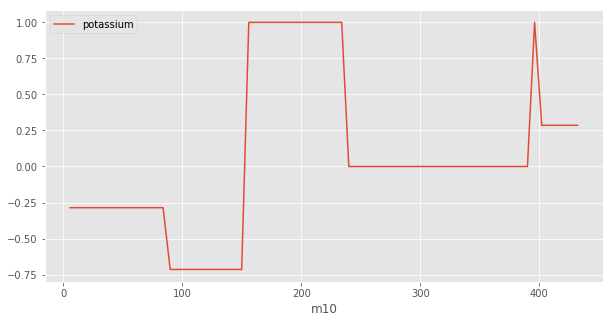

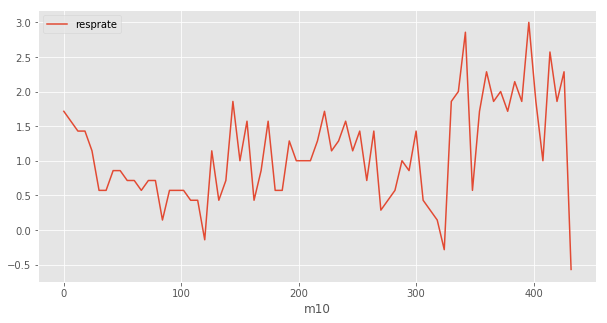

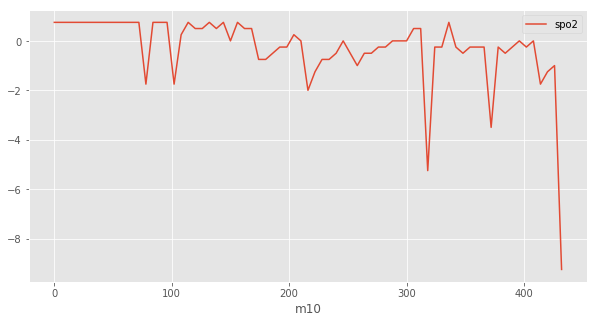

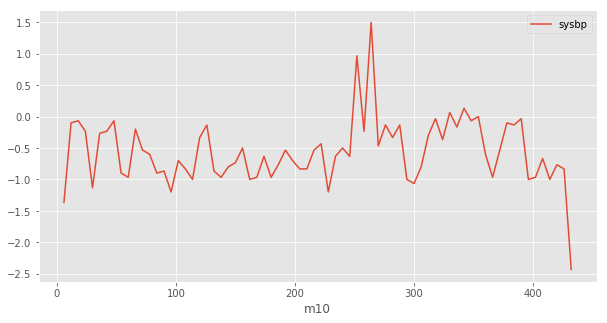

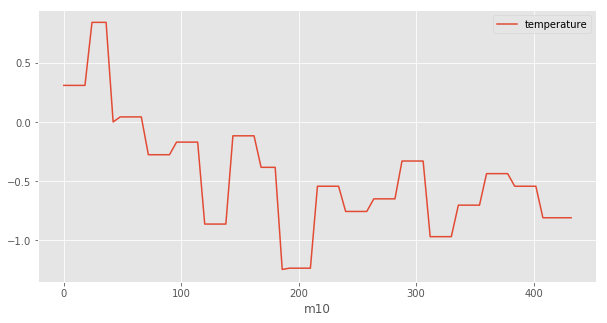

time: 2.55 s


In [223]:
##stacked plot
plt.rcParams['figure.figsize'] = [15, 10]
ax = sns.lineplot(x="m10", y="standardize",
                   hue="label", data=test_restacked2)
                   
##individual plot

for index, group in test_restacked2.groupby('label'):
    plt.rcParams['figure.figsize'] = [10, 5]
    group.plot(x="m10",y='standardize', label=index)

# graveyard

###### failed code to get grouper to work and start at 0:00:00 and end at 2 day 23:00:00  for multiple variables.

In [ ]:
#use test_df (all variables for 1 patient)

#df2 is for a specific label= heartrate
test_df2=test_df.loc[test_df.loc[:,'label']=='heartrate',['delta','value']].copy()

#adding start and endtime if not already there.
test_df3=start_time_fxn(test_df2) #adding on 0:00:00 start and 2day 23:00:00 end. 

In [ ]:
test_df.head(5)

In [ ]:
# def time_and_fill(df):
#     df= timeframe_fix_fxn(df)
#     df= df.resample("H", on='delta').fillna(method='ffill')
#     return(df)

test_df.head(1)

In [ ]:
#works! groups timeseries object by label and filters delta by 1H freq. 
grouper = test_df[['delta','value','label']].groupby([pd.Grouper(key="delta",freq='1H'), 'label'])

grouper['value'].max().unstack("label").head(5) #visualizing first 5 rows

In [ ]:
#works! takes one patient and converts from long to wide format all values 
test_unstacked=grouper['value'].max().unstack("label") 
test_unstacked.index
#here i need to add a 0:00:00 row and 2day 23:00:00 row.

#[None for x in range(len(list(test_unstacked)))]

pd.DataFrame(data=[index= pd.Timedelta('2 days 23:00:00'),None for x in range(len(list(test_unstacked)))], index= pd.Timedelta('2 days 23:00:00'))
#test_unstacked.index[-1] #ok here is the last 

#works! resamples by 
#test_unstacked_resampled=test_unstacked.resample("H").max().fillna(method='ffill')

In [ ]:
list(test_unstacked)

In [ ]:
# #pd.DataFrame(data=[pd.Timedelta('2 days 23:00:00'),None for x in range(len(list(test_unstacked)))])

# # list1=[None for x in range(len(list(test_unstacked)))]
# # list1.append(pd.Timedelta('2 days 23:00:00'))
# # pd.DataFrame(list1)
# #df=pd.DataFrame(data=test_unstacked.iloc[-1].values,columns=list(test_unstacked))
# df= pd.DataFrame(test_unstacked.iloc[-1])
# df=df.rename(columns={pd.Timedelta("2 days 15:00:00"):pd.Timedelta("2 days 23:00:00")})
# df.iloc[:,0]=None
# #df

# test_unstacked.
# #test_unstacked.append(df)
# #pd.concat(test_unstacked, df)


# #df['delta']=pd.Timedelta('2 days 23:00:00')
# #df.set_index('delta')
# #df['delta']=pd.Timedelta('2 days 23:00:00')
# #df
# #pd.Timedelta('2 days 23:00:00')

In [ ]:
type(df)

In [ ]:
#[None for x in range(len(list(test_unstacked)))]
test_unstacked.iloc[-1].values

In [ ]:
test_unstacked.index[(-1)] #ok here is the last 